<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    71.277962  70.069091  60.713154  -2.157297  209.902910   
      1.0    74.202998  71.991151  51.052133 -30.754969  176.491313   
      2.0    68.359279  26.146495  25.577068   3.342785  133.425626   
      3.0    73.305577  60.812274  82.711756  -0.277077  226.552530   
      4.0    61.389907  61.270115  88.487699  -3.937110  217.210611   
...                ...        ...        ...        ...         ...   
999.0 15.0   22.858186  75.460912  57.014106  15.511726  180.844929   
      16.0   54.359719  96.272088  48.615044 -12.939743  196.307109   
      17.0   22.905953  51.689371  85.440107  21.588917  191.624348   
      18.0   50.565648  98.249741  55.663592   4.269775  218.748756   
      19.0   28.924614  39.084507  37.654471 -17.209725   98.453867   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    208.049905   1.853005  
      1.0    202.167340 -25.676027  
      2.0    129.131384   4.294242  
      3.0    225.814953   0.737578  
      4.0    220.662474  -3.451863  
...                 ...        ...  
999.0 15.0   167.063806  13.781123  
      16.0   205.065429  -8.758320  
      17.0   172.631338  18.993010  
      18.0   210.851073   7.897684  
      19.0   117.703255 -19.249389  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    71.277962  70.069091  60.713154  -2.157297  209.902910   
      1.0    74.202998  71.991151  51.052133 -30.754969  176.491313   
      2.0    68.359279  26.146495  25.577068   3.342785  133.425626   
      3.0    73.305577  60.812274  82.711756  -0.277077  226.552530   
      4.0    61.389907  61.270115  88.487699  -3.937110  217.210611   
...                ...        ...        ...        ...         ...   
999.0 15.0   22.858186  75.460912  57.014106  15.511726  180.844929   
      16.0   54.359719  96.272088  48.615044 -12.939743  196.307109   
      17.0   22.905953  51.689371  85.440107  21.588917  191.624348   
      18.0   50.565648  98.249741  55.663592   4.269775  218.748756   
      19.0   28.924614  39.084507  37.654471 -17.209725   98.453867   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    208.049905   1.853005  
      1.0    202.167340 -25.676027  
      2.0    129.131384   4.294242  
      3.0    225.814953   0.737578  
      4.0    220.662474  -3.451863  
...                 ...        ...  
999.0 15.0   167.063806  13.781123  
      16.0   205.065429  -8.758320  
      17.0   172.631338  18.993010  
      18.0   210.851073   7.897684  
      19.0   117.703255 -19.249389  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    71.277962  70.069091  60.713154  -2.157297  209.902910   
      1.0    74.202998  71.991151  51.052133 -30.754969  176.491313   
      2.0    68.359279  26.146495  25.577068   3.342785  133.425626   
      3.0    73.305577  60.812274  82.711756  -0.277077  226.552530   
      4.0    61.389907  61.270115  88.487699  -3.937110  217.210611   
...                ...        ...        ...        ...         ...   
999.0 15.0   22.858186  75.460912  57.014106  15.511726  180.844929   
      16.0   54.359719  96.272088  48.615044 -12.939743  196.307109   
      17.0   22.905953  51.689371  85.440107  21.588917  191.624348   
      18.0   50.565648  98.249741  55.663592   4.269775  218.748756   
      19.0   28.924614  39.084507  37.654471 -17.209725   98.453867   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    208.049905   1.853005  
      1.0    202.167340 -25.676027  
      2.0    129.131384   4.294242  
      3.0    225.814953   0.737578  
      4.0    220.662474  -3.451863  
...                 ...        ...  
999.0 15.0   167.063806  13.781123  
      16.0   205.065429  -8.758320  
      17.0   172.631338  18.993010  
      18.0   210.851073   7.897684  
      19.0   117.703255 -19.249389  

[20000 rows x 7 columns]

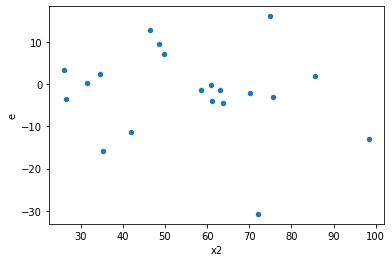

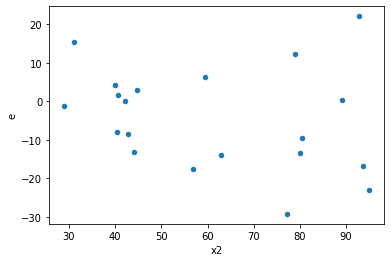

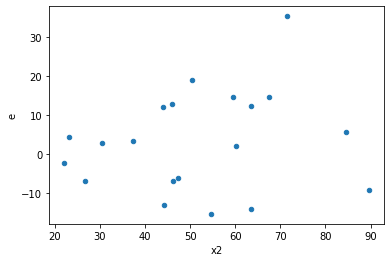

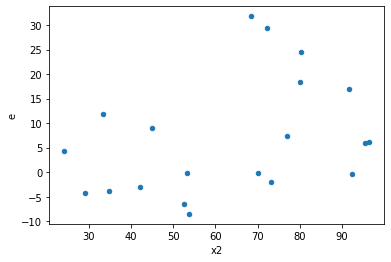

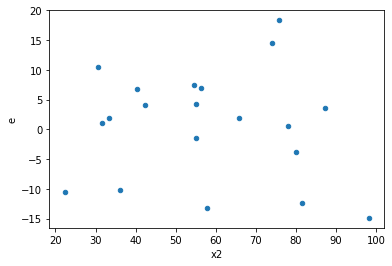

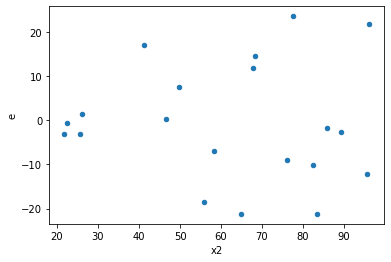

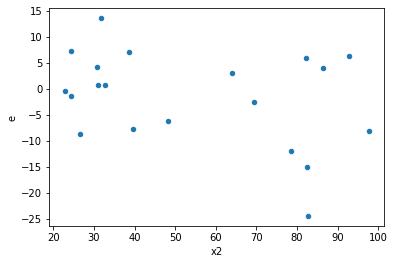

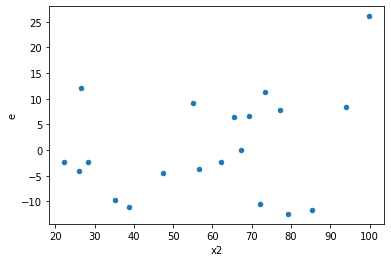

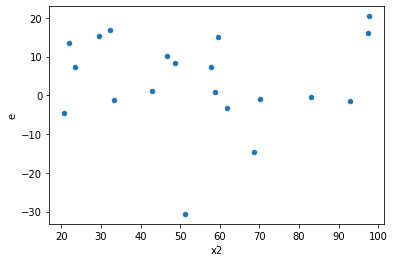

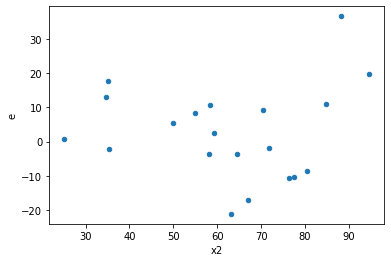

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,319.08944676337364,1157.236645542872,63.817889352674726,231.44732910857442,3.626684170476629,0.18369330314340782,0.9081533484282961,0.09184665157170391,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,111.59630025379101,478.91974573513227,22.319260050758203,95.78394914702645,4.291537843512541,0.13581851329553607,0.932090743352232,0.06790925664776803,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,149.92220049004558,642.6820295381947,29.984440098009117,128.53640590763894,4.286770254421839,0.13609641693022367,0.9319517915348882,0.06804820846511184,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,56.400881362022766,453.51738228593234,11.280176272404553,90.70347645718647,8.04096268239003,0.03908263997282635,0.9804586800135868,0.019541319986413175,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,244.96636565837417,1557.9937203627271,48.99327313167483,311.5987440725454,6.360031166627495,0.06345887156208474,0.9682705642189576,0.03172943578104237,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,564.1028997337501,728.1998867279613,112.82057994675002,145.63997734559226,1.2908990311371613,0.7861652595170097,0.6069173702414952,0.39308262975850483,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,219.67079507364758,853.4460215853285,43.93415901472952,170.6892043170657,3.885113728018325,0.16266175496687318,0.9186691225165634,0.08133087748343659,Reject005=1 : Homoscedasticity
12.0,5.0,5.0,540.0758468550663,740.4671202271893,108.01516937101326,148.09342404543787,1.3710428350740516,0.7375764436750205,0.6312117781624897,0.36878822183751025,Reject005=1 : Homoscedasticity
13.0,5.0,5.0,857.6423025674667,2342.525071327934,171.52846051349334,468.50501426558674,2.7313543936851903,0.2942693015957958,0.8528653492021021,0.1471346507978979,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,452.44735733877826,369.71340195678636,90.48947146775565,73.94268039135727,0.8171412562367044,0.8300290275705116,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,319.08944676337364,1157.236645542872,63.817889352674726,231.44732910857442,3.626684170476629,0.18369330314340782,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,726.848488045982,66.5548029121232,145.3696976091964,13.310960582424638,0.09156626725749313,0.02018596948405277,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,111.59630025379101,478.91974573513227,22.319260050758203,95.78394914702645,4.291537843512541,0.13581851329553607,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,595.9484899694206,190.62777218581869,119.18969799388412,38.125554437163736,0.3198729007528825,0.2365619426286632,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,149.92220049004558,642.6820295381947,29.984440098009117,128.53640590763894,4.286770254421839,0.13609641693022367,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,56.400881362022766,453.51738228593234,11.280176272404553,90.70347645718647,8.04096268239003,0.03908263997282635,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,375.01181988215706,360.43447338649196,75.00236397643141,72.08689467729839,0.9611283012352895,0.9663572836869134,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,244.96636565837417,1557.9937203627271,48.99327313167483,311.5987440725454,6.360031166627495,0.06345887156208474,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      888
Reject005=0 : Heteroscedasticity    112
Name: Result_test, dtype: int64